In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import pandas as pd
import glob
from IPython.display import display
import numpy as np

In [3]:
folder_path = 'Internet_datasets'
dataframes = []
# Utilizar glob para encontrar todos los archivos CSV en la carpeta
csv_files = glob.glob(folder_path + '\\*.pickle')

# Imprimir los nombres de los archivos CSV encontrados
for file_path in csv_files:
    file_name = file_path.split('\\')[-1]
    df = pd.read_pickle(f'./Internet_datasets/{file_name}')
    print(file_name)
    dataframes.append(df)

Accesos_banda_ancha_y_angosta_por_provincia.pickle
Accesos_Internet_fijo_por_tecnología_y_localidad.pickle
Accesos_Internet_fijo_por_velocidad_bajada_y_localidad.pickle
Accesos_Internet_fijo_por_velocidad_bajada_y_provincia.pickle
Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia.pickle
Acceso_Internet_fijo_por_tecnología_y_provincia.pickle
Conectividad_al_servicio_Internet.pickle
Distribución_accesos_totales_nacionales_internet_fijo_por_velocidad.pickle
Ingresos_trimestrales_prestación_servicio_Internet_fijo.pickle
Listado_localidades_conectividad_internet.pickle
Penetración_de_Internet fijo_(accesos_cada_100 hogares).pickle
Penetración_por_hogares_nacional_Internet fijo.pickle
Serie_trimestral_accesos_Internet_fijo_por_tecnología.pickle
Total_nacional_accesos_Internet_banda_ancha_y_banda_angosta.pickle
Velocidad_media_bajada_Internet_fijo_por_provincia.pickle
Velocidad_Media_de_bajada_Internet_fijo.pickle


In [18]:
display(dataframes[0])
display(dataframes[0].info())

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,1,Buenos Aires,4549131,6293,4555424
1,2022,1,Capital Federal,1415378,2163,1417541
2,2022,1,Catamarca,62377,1,62378
3,2022,1,Chaco,144114,5,144119
4,2022,1,Chubut,170701,927,171628
...,...,...,...,...,...,...
787,2014,1,Santa Cruz,26304,460,26764
788,2014,1,Santa Fe,506000,612,506612
789,2014,1,Santiago Del Estero,37124,9,37133
790,2014,1,Tierra Del Fuego,27272,766,28038


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               792 non-null    int64 
 1   Trimestre         792 non-null    int64 
 2   Provincia         792 non-null    object
 3   Banda ancha fija  792 non-null    int32 
 4   Dial up           792 non-null    int32 
 5   Total             792 non-null    int32 
dtypes: int32(3), int64(2), object(1)
memory usage: 28.0+ KB


None

In [21]:
dataframes[0]['Año y trimestre'] = dataframes[0]['Año'].astype(str)+'-'+dataframes[0]['Trimestre'].astype(str)

In [22]:
dataframes[0]

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total,Año y trimestre
0,2022,1,Buenos Aires,4549131,6293,4555424,2022-1
1,2022,1,Capital Federal,1415378,2163,1417541,2022-1
2,2022,1,Catamarca,62377,1,62378,2022-1
3,2022,1,Chaco,144114,5,144119,2022-1
4,2022,1,Chubut,170701,927,171628,2022-1
...,...,...,...,...,...,...,...
787,2014,1,Santa Cruz,26304,460,26764,2014-1
788,2014,1,Santa Fe,506000,612,506612,2014-1
789,2014,1,Santiago Del Estero,37124,9,37133,2014-1
790,2014,1,Tierra Del Fuego,27272,766,28038,2014-1


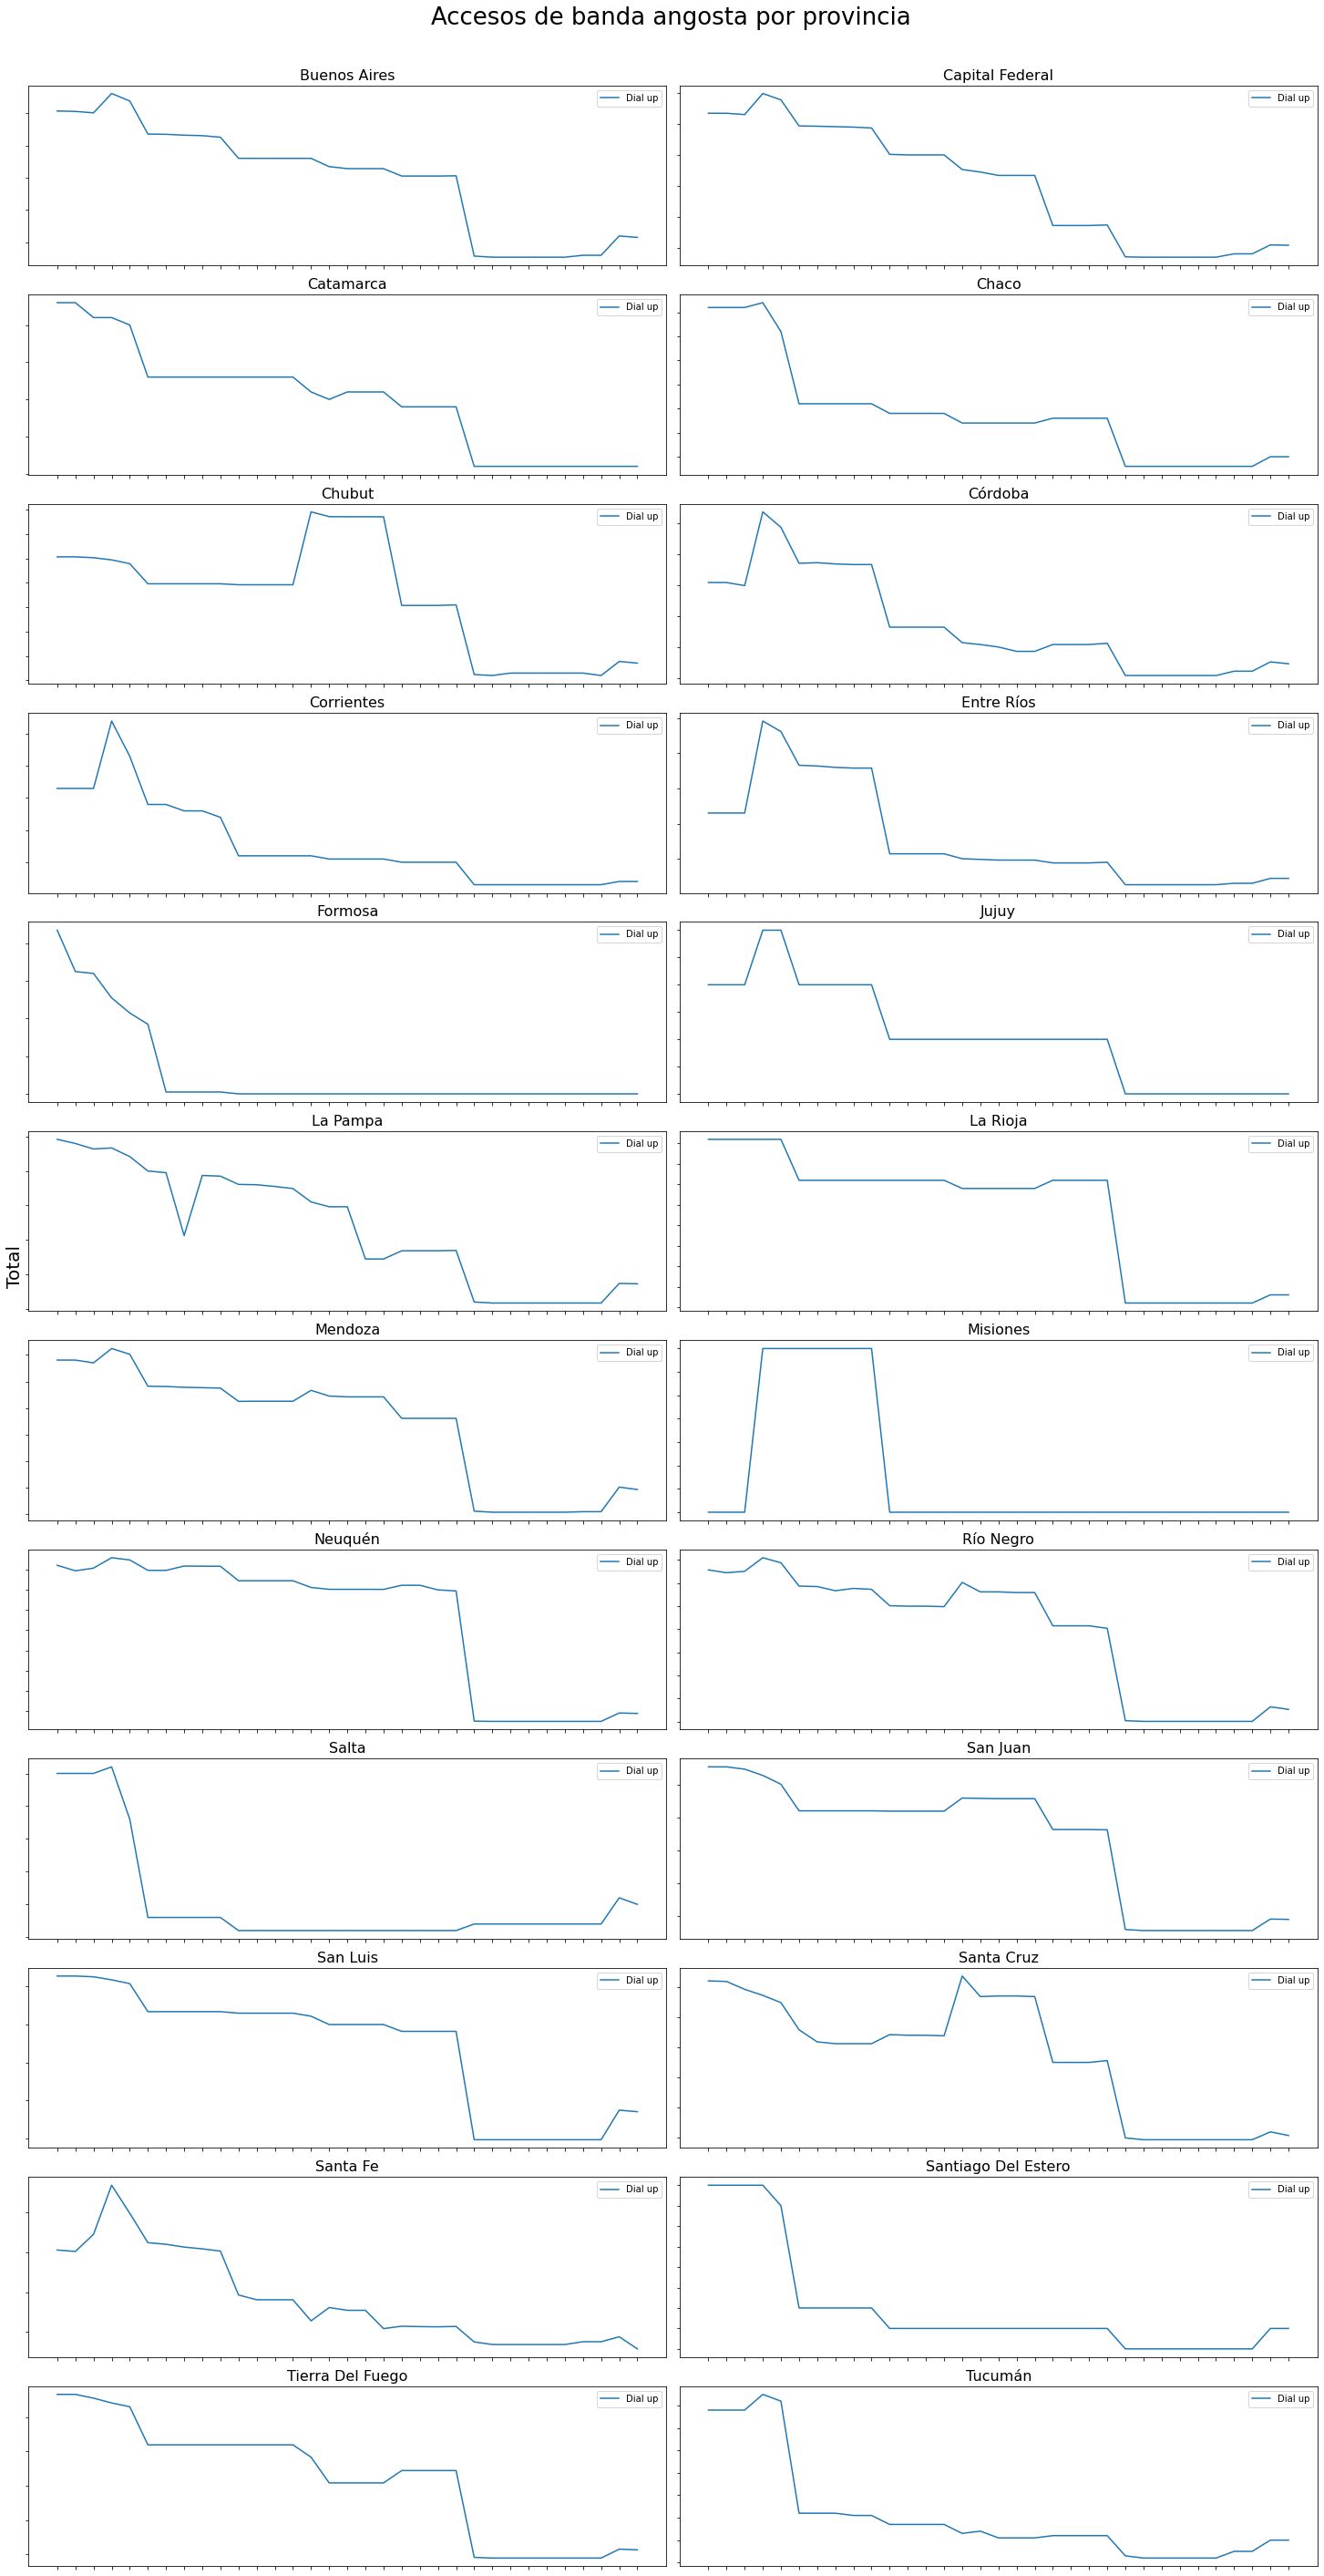

In [30]:
provincias = dataframes[0]['Provincia'].unique()
num_filas = (len(provincias) + 1) // 2
num_columnas = 2

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 40))

for i, provincia in enumerate(provincias):
    fila = i // num_columnas
    columna = i % num_columnas
    
    ax = axs[fila, columna] if num_filas > 1 else axs[columna]
    
    temp = dataframes[0][dataframes[0]['Provincia'] == provincia].sort_values('Año y trimestre')
    
    # Agregar línea para 'banda angosta'
    ax.plot(temp['Año y trimestre'], temp['Dial up'], label='Dial up')
    
    ax.legend()
    
    # Eliminar etiquetas del eje y
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    # Agregar título de la provincia encima del gráfico
    ax.set_title(provincia, fontsize=16)
    
# Ajustar los espacios entre los subplots
plt.tight_layout()

# Ajustar los márgenes para dejar espacio al título general
plt.subplots_adjust(top=0.95)

# Título general
fig.suptitle('Accesos de banda angosta por provincia', fontsize=26)

# Título del eje Y general
fig.text(0, 0.5, 'Total', va='center', rotation='vertical', fontsize=20, ha='center')

# Mostrar el gráfico
plt.show()

Realizando un simple vistaso a la tecnologia dial up o banda angosta se evidencia que es una tecnologia obsoleta que solo se podria justificar en casos de emergencia o de una tasa de transferencia de informacion infimo.

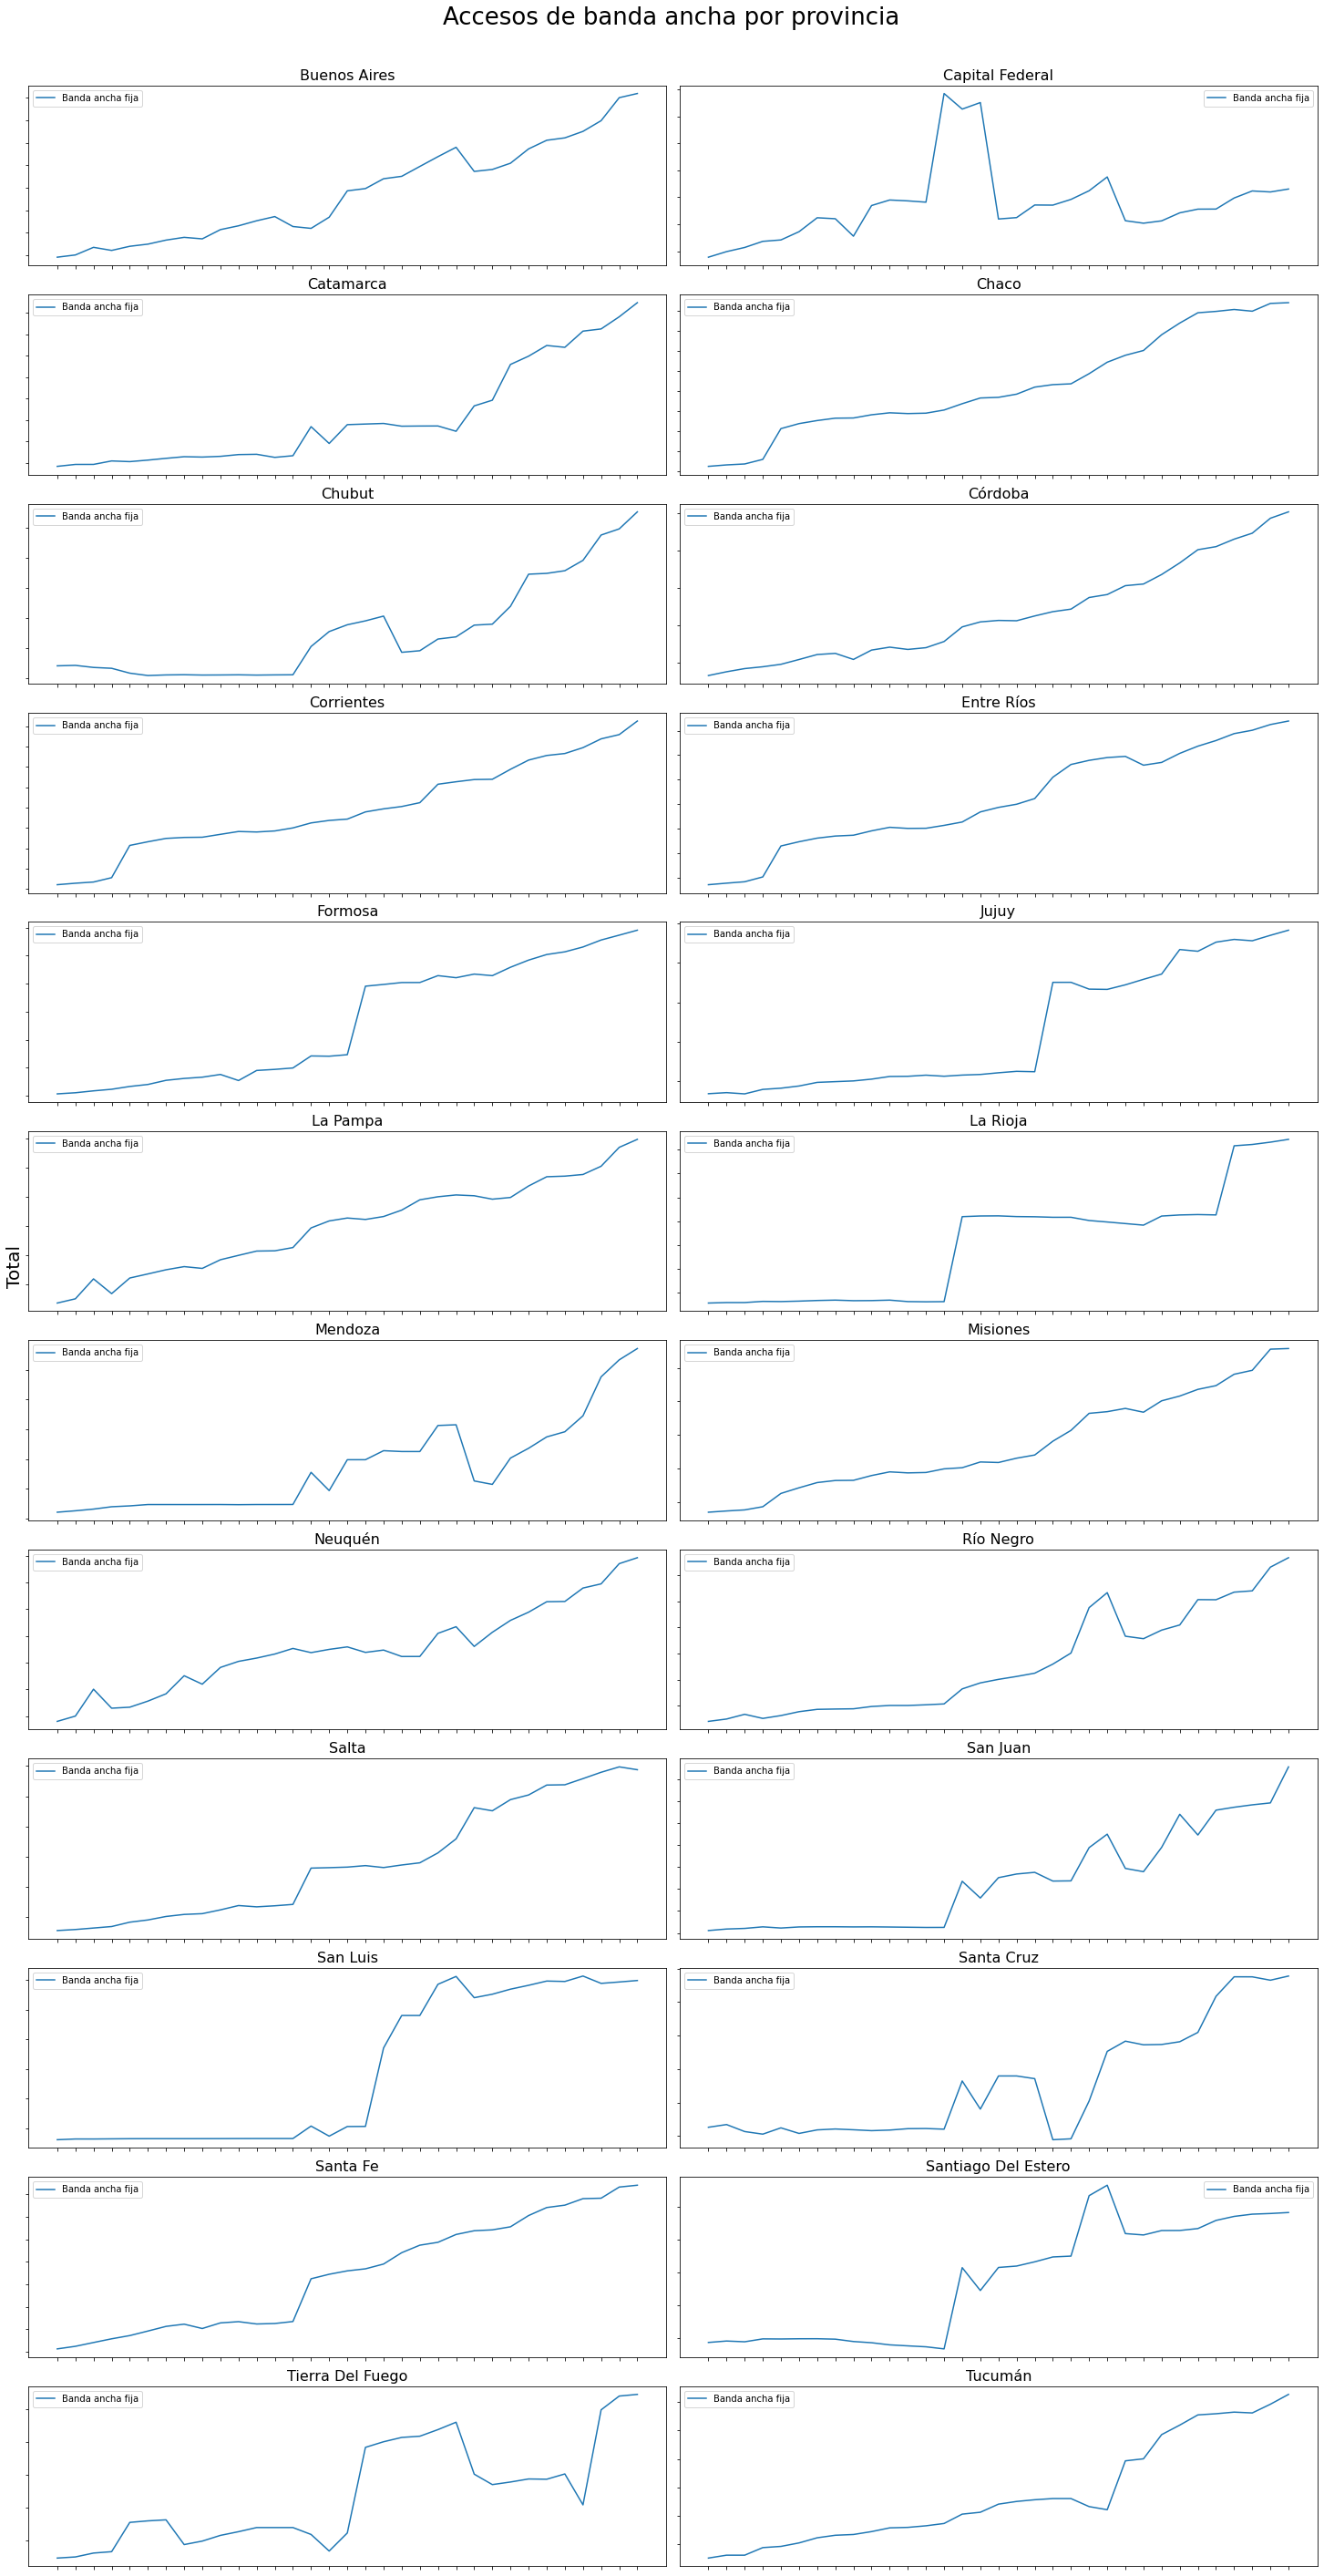

In [31]:
provincias = dataframes[0]['Provincia'].unique()
num_filas = (len(provincias) + 1) // 2
num_columnas = 2

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 40))

for i, provincia in enumerate(provincias):
    fila = i // num_columnas
    columna = i % num_columnas
    
    ax = axs[fila, columna] if num_filas > 1 else axs[columna]
    
    temp = dataframes[0][dataframes[0]['Provincia'] == provincia].sort_values('Año y trimestre')
    
    # Agregar línea para 'banda ancha'
    ax.plot(temp['Año y trimestre'], temp['Banda ancha fija'], label='Banda ancha fija')
    
    ax.legend()
    
    # Eliminar etiquetas del eje y x
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    # Agregar título de la provincia encima del gráfico
    ax.set_title(provincia, fontsize=16)
    
# Ajustar los espacios entre los subplots
plt.tight_layout()

# Ajustar los márgenes para dejar espacio al título general
plt.subplots_adjust(top=0.95)

# Título general
fig.suptitle('Accesos de banda ancha por provincia', fontsize=26)

# Título del eje Y general
fig.text(0, 0.5, 'Total', va='center', rotation='vertical', fontsize=20, ha='center')

# Mostrar el gráfico
plt.show()

En el caso del acceso a banda ancha contrariamente a el caso de banda angosta, en la mayoria de las provincia se produce un crecimiento alcista y en el caso de capital federal donde en un momento se produjo un pico en el acceso y luego volvio a niveles normales.

In [4]:
dataframes[1]

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,914,4704,0,5,0,975,0,664,7262
1,BUENOS AIRES,25 de Mayo,Del Valle,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,0,782,0,0,18,0,0,327,1127
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3122,TUCUMAN,Tafí Viejo,El Cadillal,0,0,0,0,0,1,0,0,1
3123,TUCUMAN,Trancas,San Pedro de Colalao,0,0,0,0,0,0,0,234,234
3124,TUCUMAN,Trancas,Villa de Trancas,197,0,0,0,0,0,0,111,308
3125,TUCUMAN,Yerba Buena,Villa Carmela,2062,0,0,0,1,0,0,97,2160


In [55]:
df = dataframes[1].groupby('Provincia')[['ADSL','CABLEMODEM','DIAL UP','FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS','Total general']].sum().reset_index()
df.sort_values('Total general',inplace=True)
df.head()

,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
19,SANTA CRUZ,10537,23420,204,10766,122,79,0,3974,49102
22,TIERRA DEL FUEGO,13031,38700,313,416,4,23,0,124,52611
8,FORMOSA,16397,15927,0,5146,144,58,0,16876,54548
2,CATAMARCA,14181,15517,1,29118,2152,81,0,1328,62378
11,LA RIOJA,9103,59228,4,9546,7,20,0,6395,84303


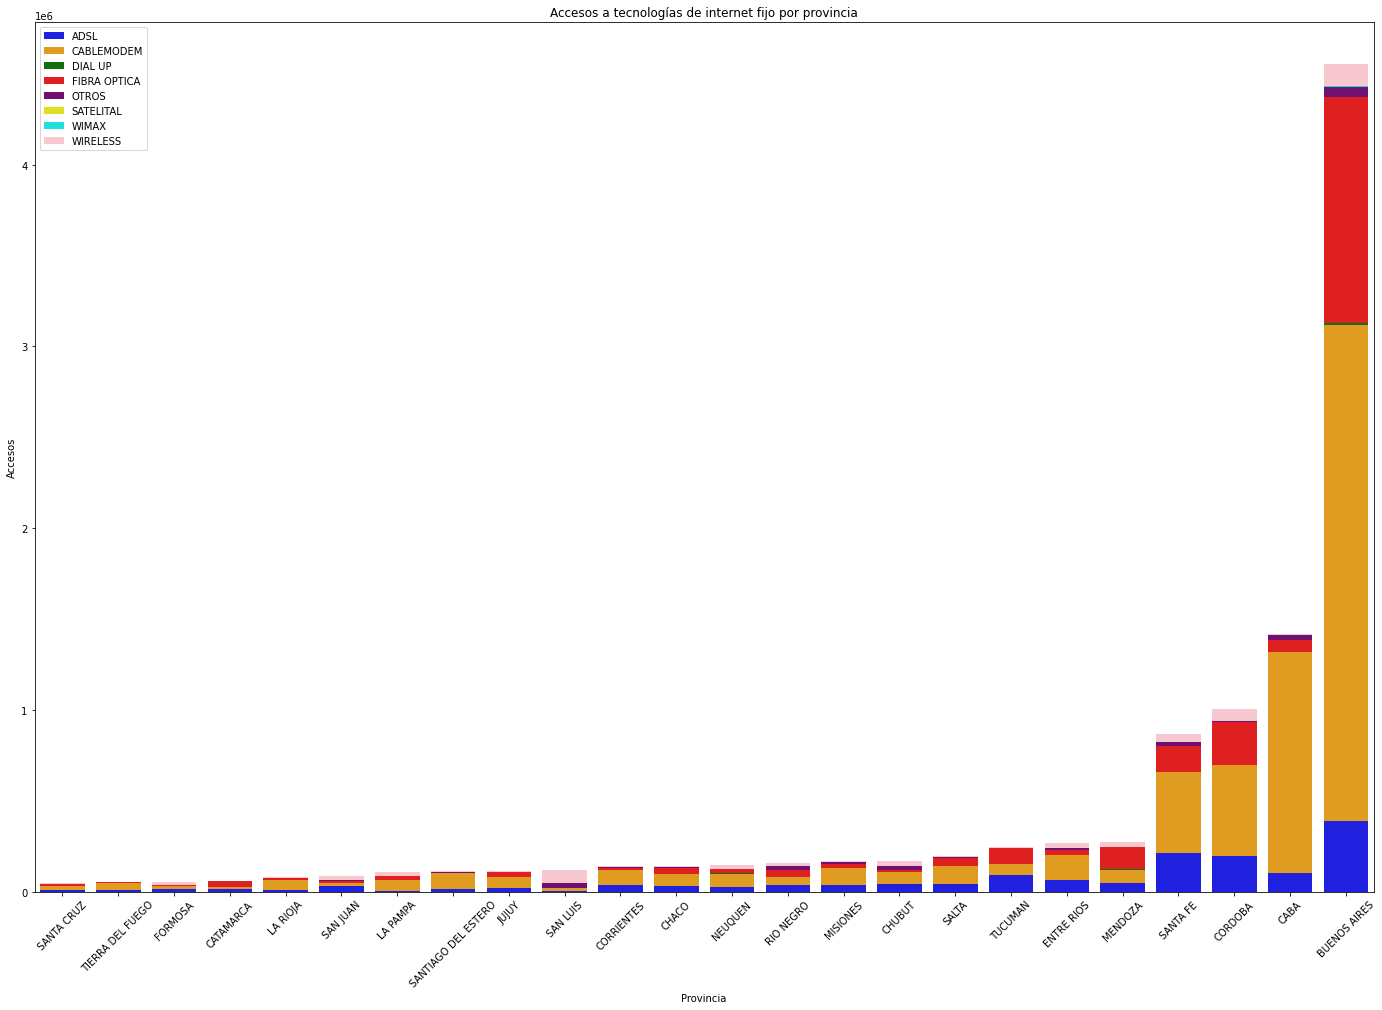

In [59]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(24, 16))

# Crear el gráfico de barras compuestas
sns.barplot(x='Provincia', y='ADSL', data=df, color='blue', label='ADSL')
sns.barplot(x='Provincia', y='CABLEMODEM', data=df, color='orange', label='CABLEMODEM', bottom=df['ADSL'])
sns.barplot(x='Provincia', y='DIAL UP', data=df, color='green', label='DIAL UP', bottom=df['ADSL'] + df['CABLEMODEM'])
sns.barplot(x='Provincia', y='FIBRA OPTICA', data=df, color='red', label='FIBRA OPTICA', bottom=df['ADSL'] + df['CABLEMODEM'] + df['DIAL UP'])
sns.barplot(x='Provincia', y='OTROS', data=df, color='purple', label='OTROS', bottom=df['ADSL'] + df['CABLEMODEM'] + df['DIAL UP'] + df['FIBRA OPTICA'])
sns.barplot(x='Provincia', y='SATELITAL', data=df, color='yellow', label='SATELITAL', bottom=df['ADSL'] + df['CABLEMODEM'] + df['DIAL UP'] + df['FIBRA OPTICA'] + df['OTROS'])
sns.barplot(x='Provincia', y='WIMAX', data=df, color='cyan', label='WIMAX', bottom=df['ADSL'] + df['CABLEMODEM'] + df['DIAL UP'] + df['FIBRA OPTICA'] + df['OTROS'] + df['SATELITAL'])
sns.barplot(x='Provincia', y='WIRELESS', data=df, color='pink', label='WIRELESS', bottom=df['ADSL'] + df['CABLEMODEM'] + df['DIAL UP'] + df['FIBRA OPTICA'] + df['OTROS'] + df['SATELITAL'] + df['WIMAX'])

# Personalizar el gráfico
plt.xlabel('Provincia')
plt.ylabel('Accesos')
plt.title('Accesos a tecnologías de internet fijo por provincia')
plt.legend()
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

Como es de esperar las provincias mas desarrolladas como Buenos Aires y CABA son las que poseen el mayor acceso a internet fijo y las provinvias mas alejadas de estas o con menor desarrollo como santa cruz y tierra del fuego possen mejor acceso. Se observa tambien una predominancia de la tecnologia de cable modem en la mayoria de las provincias. En el siguiente graficas se quitaran las provincia mas desarroladas para observar mejor la distribucion en las provincias de menor desarrollo.

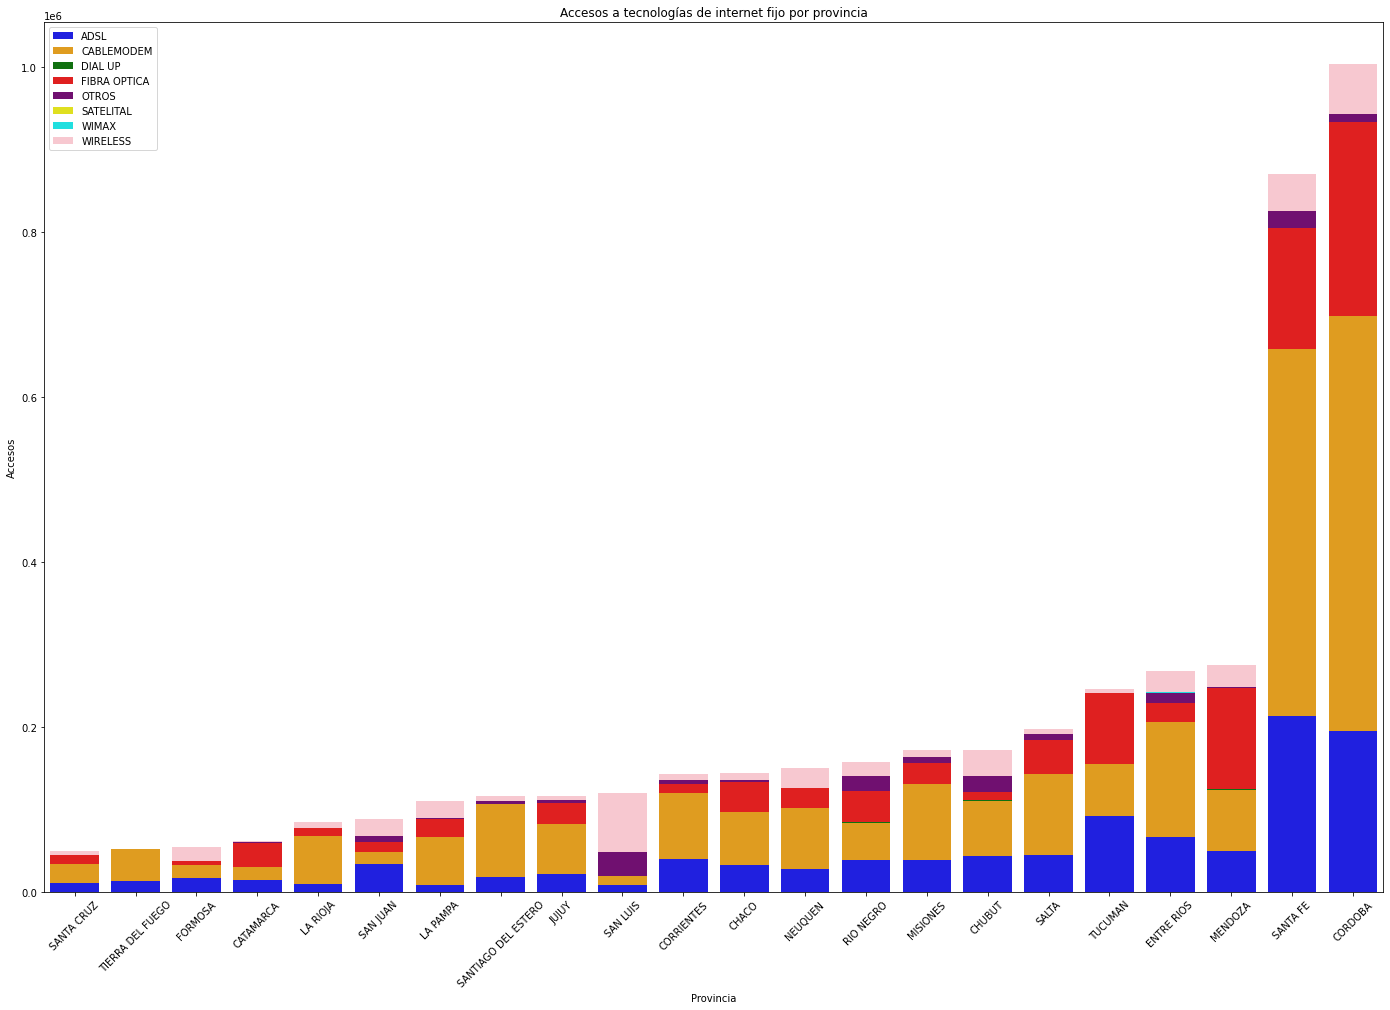

In [62]:
df = df.drop(df[(df['Provincia'] == 'BUENOS AIRES') | (df['Provincia'] == 'CABA')].index)

# Configurar el tamaño del gráfico
plt.figure(figsize=(24, 16))

# Crear el gráfico de barras compuestas
sns.barplot(x='Provincia', y='ADSL', data=df, color='blue', label='ADSL')
sns.barplot(x='Provincia', y='CABLEMODEM', data=df, color='orange', label='CABLEMODEM', bottom=df['ADSL'])
sns.barplot(x='Provincia', y='DIAL UP', data=df, color='green', label='DIAL UP', bottom=df['ADSL'] + df['CABLEMODEM'])
sns.barplot(x='Provincia', y='FIBRA OPTICA', data=df, color='red', label='FIBRA OPTICA', bottom=df['ADSL'] + df['CABLEMODEM'] + df['DIAL UP'])
sns.barplot(x='Provincia', y='OTROS', data=df, color='purple', label='OTROS', bottom=df['ADSL'] + df['CABLEMODEM'] + df['DIAL UP'] + df['FIBRA OPTICA'])
sns.barplot(x='Provincia', y='SATELITAL', data=df, color='yellow', label='SATELITAL', bottom=df['ADSL'] + df['CABLEMODEM'] + df['DIAL UP'] + df['FIBRA OPTICA'] + df['OTROS'])
sns.barplot(x='Provincia', y='WIMAX', data=df, color='cyan', label='WIMAX', bottom=df['ADSL'] + df['CABLEMODEM'] + df['DIAL UP'] + df['FIBRA OPTICA'] + df['OTROS'] + df['SATELITAL'])
sns.barplot(x='Provincia', y='WIRELESS', data=df, color='pink', label='WIRELESS', bottom=df['ADSL'] + df['CABLEMODEM'] + df['DIAL UP'] + df['FIBRA OPTICA'] + df['OTROS'] + df['SATELITAL'] + df['WIMAX'])

# Personalizar el gráfico
plt.xlabel('Provincia')
plt.ylabel('Accesos')
plt.title('Accesos a tecnologías de internet fijo por provincia')
plt.legend()
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

In [64]:
dataframes[2]

,Provincia,Partido,Localidad,Otros,0.256Mb,0.375Mb,0.5Mb,0.512Mb,0.625Mb,0.75Mb,...,75Mb,78Mb,80Mb,82Mb,83Mb,85Mb,90Mb,92Mb,95Mb,100Mb
0,BUENOS AIRES,25 de Mayo,25 de Mayo,0,0,0,2,0,0,21,...,0,0,9,0,0,0,0,0,0,0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BUENOS AIRES,25 de Mayo,Del Valle,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BUENOS AIRES,25 de Mayo,Ernestina,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,TUCUMAN,Tafí Viejo,Tafí Viejo,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,982
3082,TUCUMAN,Trancas,San Pedro de Colalao,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3083,TUCUMAN,Trancas,Villa de Trancas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3084,TUCUMAN,Yerba Buena,Villa Carmela,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(24, 16))

# Crear el gráfico de barras compuestas
sns.barplot(x='Localidad', y='ADSL', data=dataframes[2], color='blue', label='ADSL')
# Personalizar el gráfico
plt.xlabel('Provincia')
plt.ylabel('Accesos')
plt.title('Accesos a tecnologías de internet fijo por provincia')
plt.legend()
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

ValueError: Could not interpret input 'Velocidad'

<Figure size 720x432 with 0 Axes>

In [3]:
keys = ['ADSL','CABLEMODEM','DIALUP','FIBRAOPTICA','SATELITAL','WIRELESS','TELEFONIAFIJA','3G','4G']

In [4]:
porcentaje_si = lambda x: (x == 'SI').sum() / x.count() * 100

In [5]:
df_porcentaje_SI = df_Conectividad_servicio_Internet.groupby('Provincia').agg({'ADSL': porcentaje_si,
                                                    'CABLEMODEM': porcentaje_si,
                                                    'DIALUP': porcentaje_si,
                                                    'FIBRAOPTICA': porcentaje_si,
                                                    'SATELITAL': porcentaje_si,
                                                    'WIRELESS': porcentaje_si,
                                                    'TELEFONIAFIJA': porcentaje_si,
                                                    '3G': porcentaje_si,
                                                    '4G': porcentaje_si})
df_porcentaje_SI = df_porcentaje_SI.reset_index()
df_porcentaje_SI

,Provincia,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G
0,BUENOS AIRES,39.400666,38.290788,23.640400,49.167592,17.425083,55.160932,60.821310,65.482797,72.697003
1,CABA,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,CATAMARCA,3.846154,1.648352,0.549451,12.637363,26.373626,18.131868,17.032967,15.934066,31.318681
3,CHACO,30.434783,15.217391,1.086957,48.913043,46.739130,50.000000,51.086957,47.826087,81.521739
4,CHUBUT,14.444444,12.222222,16.666667,14.444444,54.444444,34.444444,60.000000,34.444444,42.222222
5,CORDOBA,32.553957,16.007194,0.899281,30.935252,13.129496,52.517986,55.755396,49.820144,61.870504
6,CORRIENTES,26.923077,11.538462,1.282051,15.384615,70.512821,57.692308,65.384615,50.000000,89.743590
7,ENTRE RIOS,24.226804,20.103093,2.061856,22.680412,11.340206,67.010309,65.979381,40.206186,65.979381
8,FORMOSA,20.634921,4.761905,0.000000,25.396825,36.507937,93.650794,47.619048,25.396825,66.666667
9,JUJUY,12.500000,9.375000,0.000000,27.500000,27.500000,24.375000,22.500000,17.500000,28.125000


In [38]:
# Se elimina la columna 'DIALUP' ya que es una tecnologia obsoleta
df_porcentaje_SI.drop(['DIALUP',],axis=1,inplace=True)
df_porcentaje_SI

,Provincia,ADSL,CABLEMODEM,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G
0,BUENOS AIRES,39.400666,38.290788,49.167592,17.425083,55.160932,60.821310,65.482797,72.697003
1,CABA,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,CATAMARCA,3.846154,1.648352,12.637363,26.373626,18.131868,17.032967,15.934066,31.318681
3,CHACO,30.434783,15.217391,48.913043,46.739130,50.000000,51.086957,47.826087,81.521739
4,CHUBUT,14.444444,12.222222,14.444444,54.444444,34.444444,60.000000,34.444444,42.222222
5,CORDOBA,32.553957,16.007194,30.935252,13.129496,52.517986,55.755396,49.820144,61.870504
6,CORRIENTES,26.923077,11.538462,15.384615,70.512821,57.692308,65.384615,50.000000,89.743590
7,ENTRE RIOS,24.226804,20.103093,22.680412,11.340206,67.010309,65.979381,40.206186,65.979381
8,FORMOSA,20.634921,4.761905,25.396825,36.507937,93.650794,47.619048,25.396825,66.666667
9,JUJUY,12.500000,9.375000,27.500000,27.500000,24.375000,22.500000,17.500000,28.125000


C:\Users\guill\AppData\Local\Temp\ipykernel_21016\1551527231.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax =  sns.barplot(x='Provincia', y='Porcentaje', hue='Tipo de Conexión', data=df_melted, ci=None)


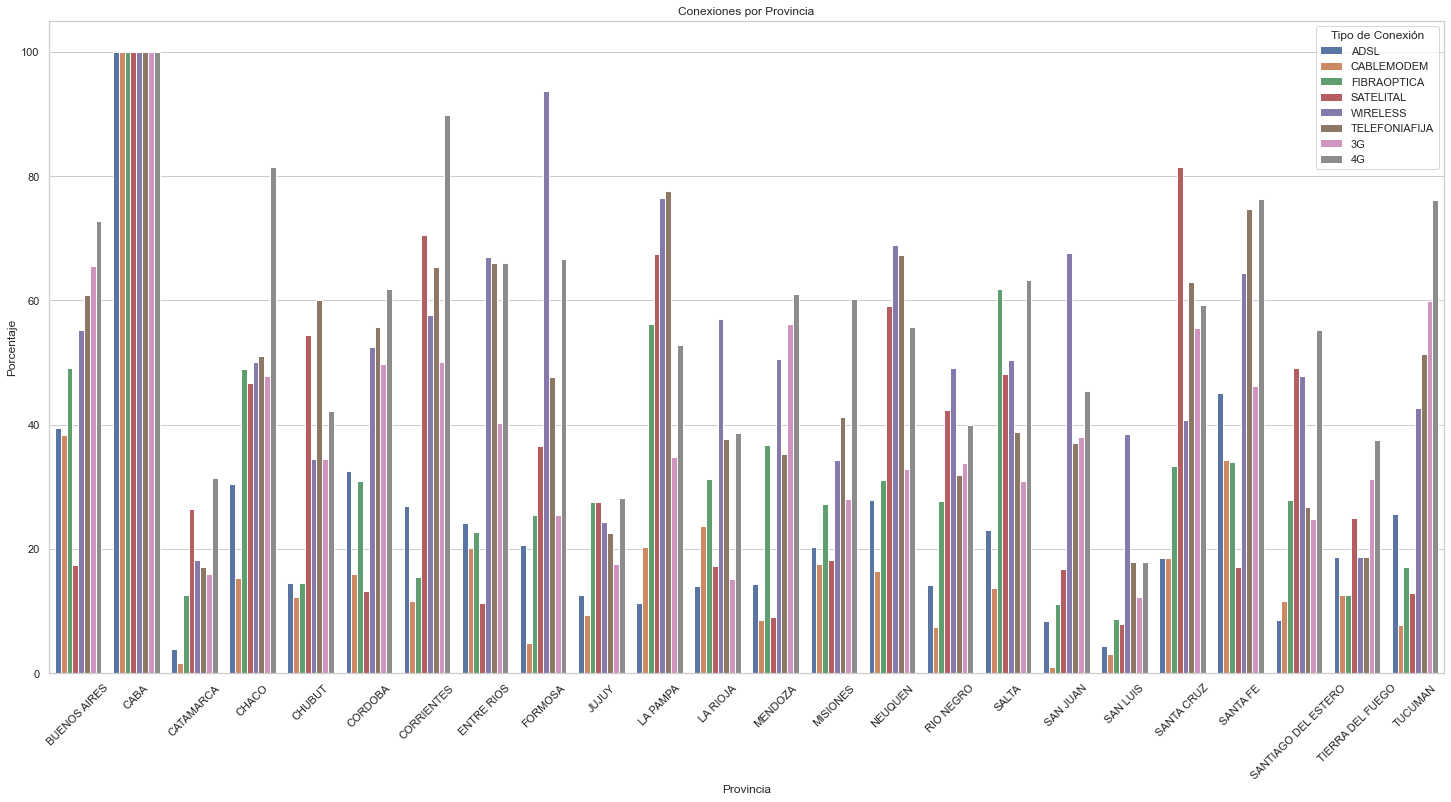

In [39]:
# Derrite el DataFrame para obtener una columna "Tipo de Conexión" y una columna "Porcentaje"
df_melted = df_porcentaje_SI.melt(id_vars='Provincia', var_name='Tipo de Conexión', value_name='Porcentaje')

# Configura el estilo de Seaborn
sns.set(style='whitegrid')

# Aumenta el tamaño del gráfico
plt.figure(figsize=(25, 12))  # Puedes ajustar el tamaño según tus necesidades

# Crea el gráfico de barras
ax =  sns.barplot(x='Provincia', y='Porcentaje', hue='Tipo de Conexión', data=df_melted, ci=None)

# Ajusta los ejes y el título
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.title('Conexiones por Provincia')

# Rotar etiquetas del eje x a 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Muestra el gráfico
plt.show()

Este grafico muestra el porcentaje de disponibilidad de las distintas tecnologias de accesos a internet teniendo en cuenta la totalidad de los barrios de cada provinvia. Se pude observar que en CABA posee todas las tecnologias por lo que se deduce que en esa provincia la competencia es alta. Pero en otras provincias como Catamarca 

In [8]:
df_Penetración_servicio_Internet_fijo = pd.read_pickle('./Internet_datasets/Penetración_servicio_Internet_fijo.pickle')

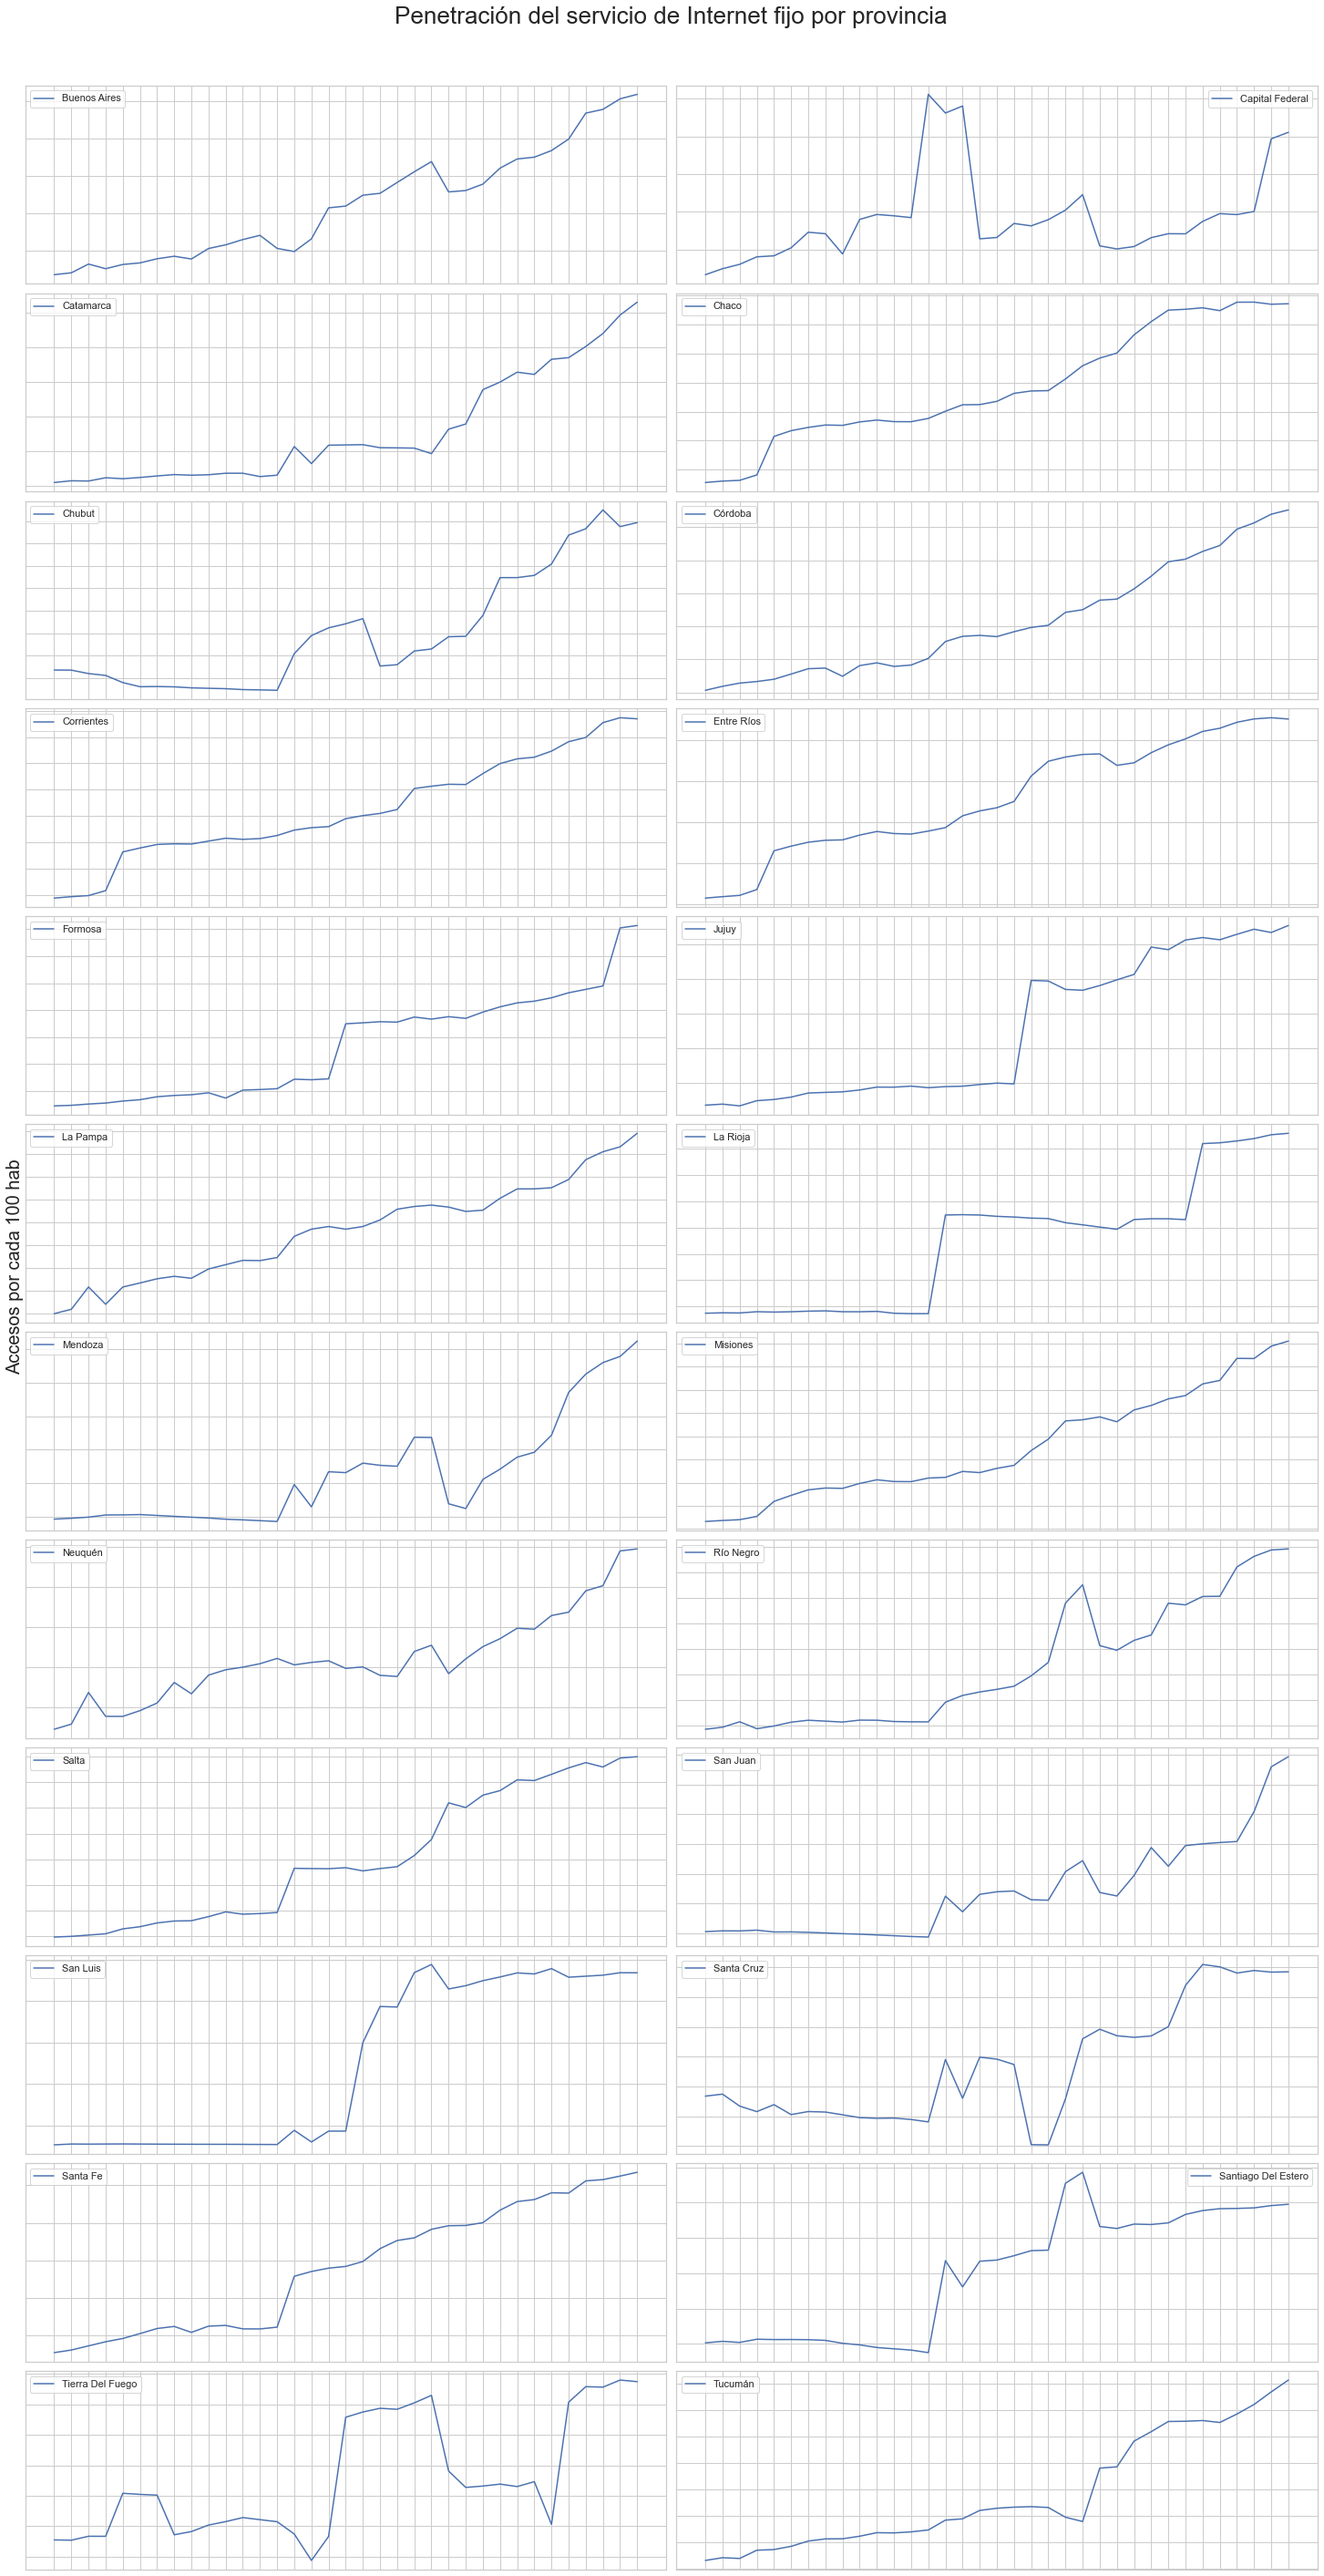

In [35]:
# Obtener la lista de provincias únicas
provincias = df_Penetración_servicio_Internet_fijo['Provincia'].unique()

# Calcular el número de filas y columnas para la cuadrícula
num_filas = (len(provincias) + 1) // 2  # Número de filas en la cuadrícula, redondeado hacia arriba
num_columnas = 2

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 40))

# Recorrer cada provincia y crear un gráfico en el subplot correspondiente
for i, provincia in enumerate(provincias):
    fila = i // num_columnas  # Fila actual en la cuadrícula
    columna = i % num_columnas  # Columna actual en la cuadrícula
    
    ax = axs[fila, columna] if num_filas > 1 else axs[columna]  # Seleccionar el subplot correspondiente
    
    temp = df_Penetración_servicio_Internet_fijo[df_Penetración_servicio_Internet_fijo['Provincia'] == provincia].sort_values('Año-Trimestre')
    ax.plot(temp['Año-Trimestre'], temp['Accesos por cada 100 hab'], label=provincia)

    ax.legend()
    
    # Eliminar etiquetas del eje y
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
# Ajustar los espacios entre los subplots
plt.tight_layout()

# Ajustar los márgenes para dejar espacio al título general
plt.subplots_adjust(top=0.95)

# Título general
fig.suptitle('Penetración del servicio de Internet fijo por provincia', fontsize=26)

# Título del eje Y general
fig.text(0, 0.5, 'Accesos por cada 100 hab', va='center', rotation='vertical', fontsize=20, ha='center')

# Mostrar el gráfico
plt.show()

Analizando las tendencias de acceso cada 100 habitantes se puede sacar como conclucion que la mayoria de las provincias tienen una tendencia alcista constantes o con pequeños rebotes que se pueden considerar como buenos signos para una empresa que se dedique a proveer acceso a internet y otras las cuales presentan volatilidad por lo que se presume que los accesos a internet fijo son temporales o por temporadas. En otros casos como San Luiz se produjo un boom en los accesos y luego se estabilizo.

In [4]:
df_Accesos_Internet_fijo_tecnología_localidad = pd.read_pickle('./Internet_datasets/Accesos_Internet_fijo_tecnología_localidad.pickle')

In [6]:
print('Número de accesos al servicio de Internet fijo por tecnología  en cada localidad declarada Categoría')
df_Accesos_Internet_fijo_tecnología_localidad

Número de accesos al servicio de Internet fijo por tecnología  en cada localidad declarada Categoría


,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,873,4704,0,2,0,975,0,664,7218
1,BUENOS AIRES,25 de Mayo,Del Valle,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3137,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,0,1,0,471,0,0,0,0,472
3138,TUCUMAN,Trancas,San Pedro de Colalao,0,0,0,0,0,0,0,313,313
3139,TUCUMAN,Trancas,Villa de Trancas,150,0,0,0,33,0,0,99,282
3140,TUCUMAN,Yerba Buena,Villa Carmela,1725,0,0,0,1,0,0,97,1823
